### WAY TO DISCRETE WAVE NUMBER METHOD

In [ ]:
#https://qiita.com/sai-sui/items/9650ff14af54dd147a39

## PREPARE

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [666]:
#t=> x
def dft_(f):
    n = len(f)
    Y = []
    for x in range(n):
        y = 0j
        for t in range(n):
            a = 2 * np.pi * t * x / n
            y += f[t] * np.exp(-1j * a)
        Y.append(y)
    return Y

In [674]:
#x=>t
def idft_(Y):
    N = len(Y)
    f = []
    for t in range(N): # t は時間ドメインの各点を示します
        val = 0j # 加算の結果を格納する新しい変数を作成します
        for x in range(N): # x は周波数ドメインの各点を示します
            a = 2 * np.pi * x * t / N
            val += Y[x] * np.exp(1j * a) # val に値を加えます
        f.append(val/N)
    return f

In [675]:
t = np.arange(0, 2*np.pi, 0.01)
f = np.cos(t)

In [676]:
ran = np.array(range(len(f)))

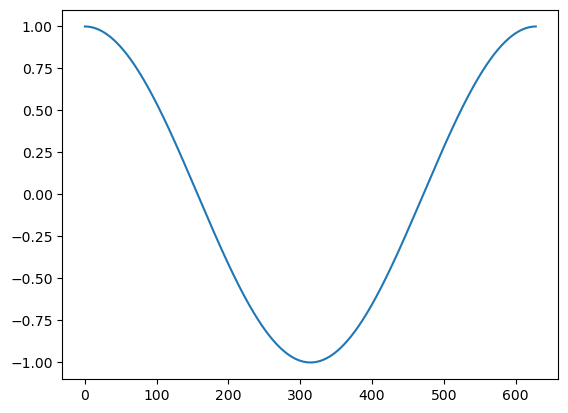

In [677]:
plt.plot(ran,f)

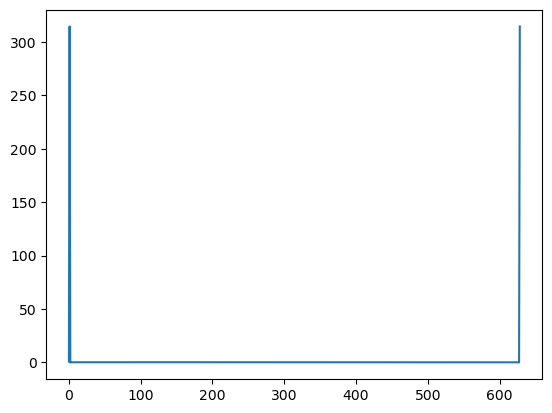

In [678]:
f_ = dft_(f)
plt.plot(ran, f_)

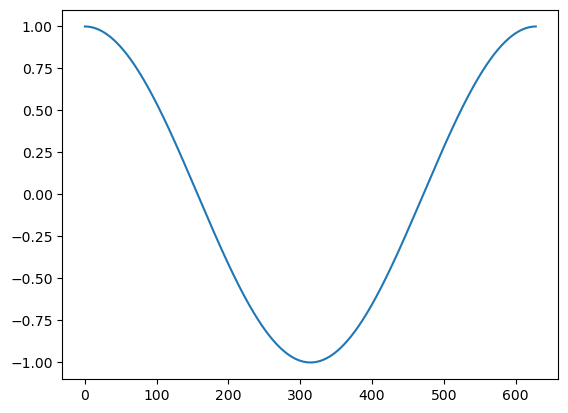

In [679]:

f_v = idft_(f_)
plt.plot(ran, f_v)

## DISCRETE WAVE NUMBER METHOD

In [ ]:
#https://ja.wikipedia.org/wiki/%E9%9B%A2%E6%95%A3%E3%83%95%E3%83%BC%E3%83%AA%E3%82%A8%E5%A4%89%E6%8F%9B

In [468]:
omega_imag = (-1j * 2 * np.pi)

In [661]:
# the DFT with the phase shift
#t => w domain
def dft_bouchon(f, omega_imag=-1j*2*np.pi):
    n = len(f)
    Y = []
    for x in range(n):
        y = 0j
        for t in range(n):
            y += f[t] * np.exp(-1j * (2 * np.pi * x * t + 2 * np.pi * omega_imag * x) /n)  #tがかかってはいけない
        Y.append(y)
    return Y

# the IDFT with the phase shift
#w => t domain
def idft_bouchon(Y, omega_imag=-1j*2*np.pi):
    n = len(Y)
    f = []
    for t in range(n):
        k = 0j
        for x in range(n):
            k += Y[x] * np.exp(1j * (2 * np.pi * x * t + 2 * np.pi * omega_imag * x) / n)
        f.append(k / n)
    return f

In [662]:
t = np.arange(0, 2*np.pi, 0.01)
f = np.cos(t)

In [663]:
# Perform the DFT again
Y = dft_bouchon(f)

# Perform the IDFT again
f_reconstructed = idft_bouchon(Y)

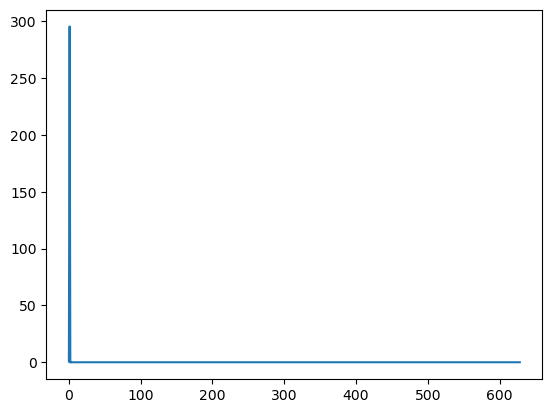

In [673]:
plt.plot(range(len(f)), Y)

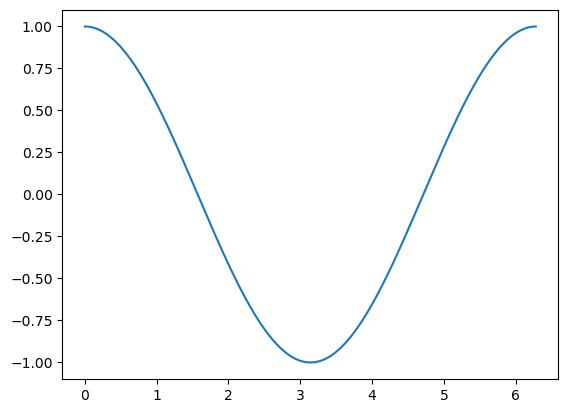

In [665]:
plt.plot(t,f_reconstructed )

In [ ]:
#parameters
L = 25
alpha = 5
r = 10
z = 1


In [ ]:
#Sommerfeld Identity
omegas =  np.array(omegas)+omega_imag
def u_values_omega_domain(omegas):
    u_values = []
    for omega in omegas:
        u_sum = 0j
        for n in n_range:
            k = 2 * n * np.pi / L
            nu = np.sqrt((omega / alpha) ** 2 - k ** 2) if np.imag(np.sqrt((omega / alpha) ** 2 - k ** 2)) < 0 else  -1*np.sqrt((omega / alpha) ** 2 - k ** 2)
            if n == 0:
                u_sum += (1j * np.pi / L) * (k ** 2 / nu) * scipy.special.jv(1, k * r) * np.exp(-1j * nu * np.abs(z))
            else:
                u_sum += (2 * (1j * np.pi / L) * (k ** 2 / nu) * scipy.special.jv(1, k * r) * np.exp(-1j * nu * np.abs(z)))
        u_values.append(u_sum)
    return np.array(u_values)